# Solve logistic regression problems with gradient descent through Autograd, no tears

This notebook will show a few things.

* HOWTO simulate data for testing logistic regression
* HOWTO solve a logistic regression problem using [Autograd](https://github.com/HIPS/autograd).

# Simulate the data

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import binomial, normal
from scipy.stats import bernoulli, binom

np.random.seed(37)
sns.set(color_codes=True)

n = 10000
X = np.hstack([
    np.array([1 for _ in range(n)]).reshape(n, 1), 
    normal(0.0, 1.0, n).reshape(n, 1), 
    normal(0.0, 1.0, n).reshape(n, 1)
])
z = np.dot(X, np.array([1.0, 2.0, 3.0])) + normal(0.0, 1.0, n)
p = 1.0 / (1.0 + np.exp(-z))
y = binom.rvs(1, p)

Text(0,0.5,'$x_1$')

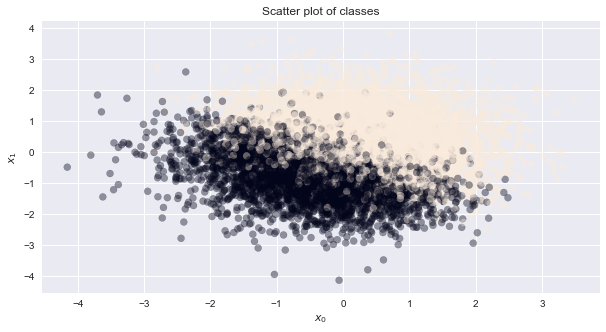

In [2]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=False, sharey=False)

ax.scatter(X[:, 1], X[:, 2], c=y, alpha=0.4)
ax.set_title('Scatter plot of classes')
ax.set_xlabel(r'$x_0$')
ax.set_ylabel(r'$x_1$')

C:\Users\jvang\AppData\Local\Continuum\Anaconda2\envs\ds\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'probability')

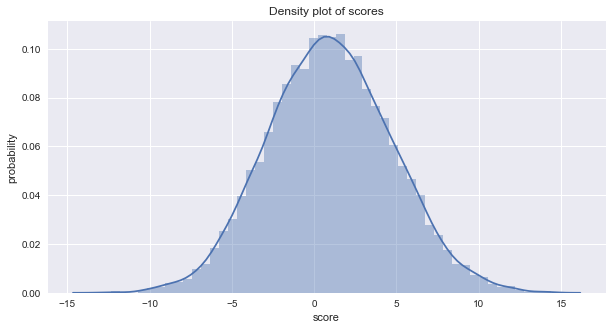

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5), sharex=False, sharey=False)

sns.distplot(z, ax=ax)
ax.set_title('Density plot of scores')
ax.set_xlabel(r'score')
ax.set_ylabel(r'probability')

Text(0,0.5,'count')

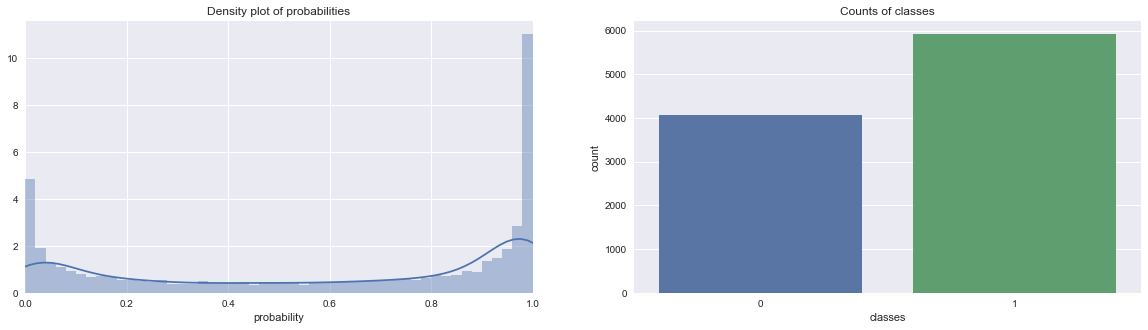

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5), sharex=False, sharey=False)

sns.distplot(p, bins=50, ax=ax[0])
ax[0].set_title('Density plot of probabilities')
ax[0].set_xlabel(r'probability')
ax[0].set_xlim([0, 1])

sns.countplot(y, ax=ax[1])
ax[1].set_title('Counts of classes')
ax[1].set_xlabel(r'classes')
ax[1].set_ylabel(r'count')

# Use gradient descent through Autograd to learn the weights

In [6]:
import autograd.numpy as np
from autograd import grad
from autograd.numpy import exp, log, sqrt

# define the loss function
def loss(w, X, y):
    n = float(len(X))
    scores = np.dot(X, w) 
    return np.sum(-(scores * y) + log(1.0 + exp(scores))) / n

#the magic line that gives you the gradient of the loss function
loss_grad = grad(loss) 

In [40]:
def learn_weights(X, y, alpha=0.05, max_iter=30000, debug=False):
    w = np.array([0.0 for _ in range(X.shape[1])])
    
    if debug is True:
        print('initial weights = {}'.format(w))

    loss_trace = []
    weight_trace = []

    for i in range(max_iter):
        loss = loss_grad(w, X, y)
        w = w - (loss * alpha)
        if i % 2000 == 0 and debug is True:
            print('{}: loss = {}, weights = {}'.format(i, loss, w))

        loss_trace.append(loss)
        weight_trace.append(w)

    if debug is True:
        print('intercept + weights: {}'.format(w))
    
    loss_trace = np.array(loss_trace)
    weight_trace = np.array(weight_trace)
    
    return w, loss_trace, weight_trace

def plot_traces(loss_trace, weight_trace):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))

    ax[0].set_title('Log-loss of the weights over iterations')
    ax[0].set_xlabel('iteration')
    ax[0].set_ylabel('log-loss')
    ax[0].plot(loss_trace[:, 0], label=r'$\beta$')
    ax[0].plot(loss_trace[:, 1], label=r'$x_0$')
    ax[0].plot(loss_trace[:, 2], label=r'$x_1$')
    ax[0].legend()

    ax[1].set_title('Weight learning over iterations')
    ax[1].set_xlabel('iteration')
    ax[1].set_ylabel('weight')
    ax[1].plot(weight_trace[:, 0], label=r'$\beta$')
    ax[1].plot(weight_trace[:, 1], label=r'$x_0$')
    ax[1].plot(weight_trace[:, 2], label=r'$x_1$')
    ax[1].legend()

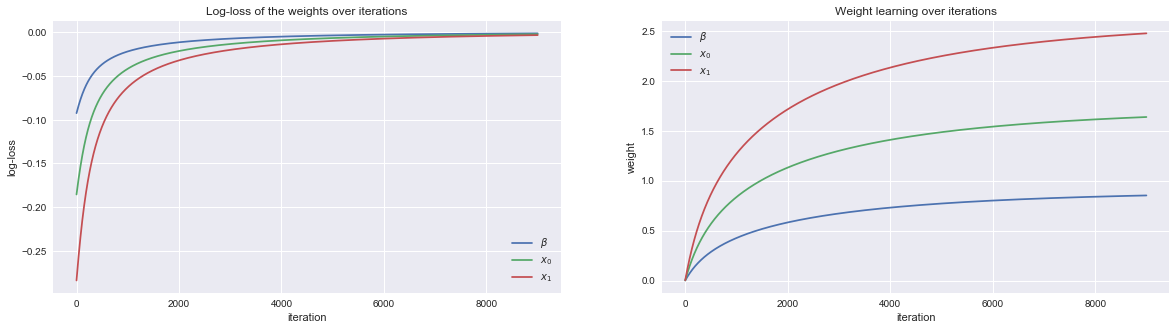

In [41]:
w, loss_trace, weight_trace = learn_weights(X, y, alpha=0.01, max_iter=9000)
plot_traces(loss_trace, weight_trace)

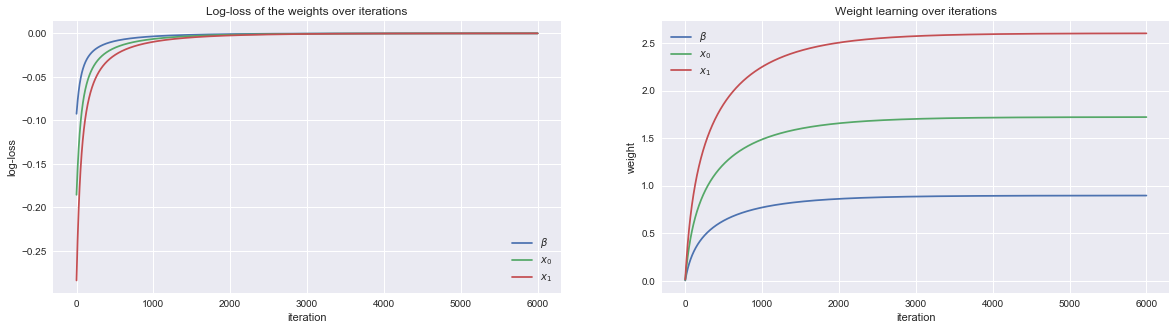

In [42]:
w, loss_trace, weight_trace = learn_weights(X, y, alpha=0.05, max_iter=6000)
plot_traces(loss_trace, weight_trace)

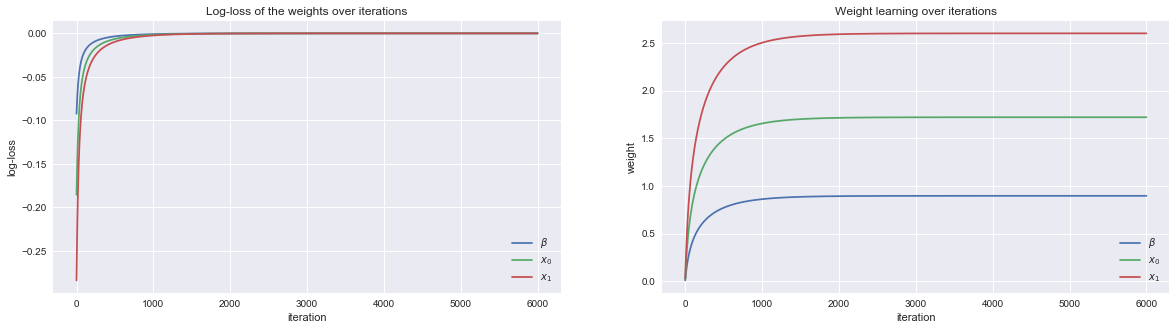

In [43]:
w, loss_trace, weight_trace = learn_weights(X, y, alpha=0.1, max_iter=6000)
plot_traces(loss_trace, weight_trace)

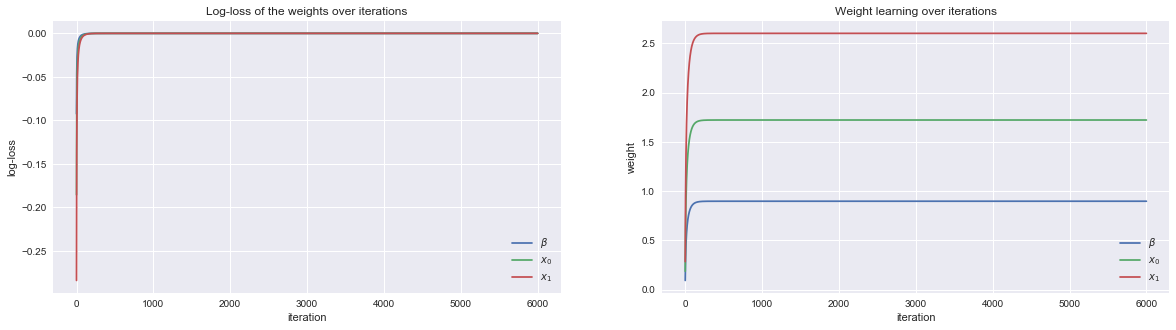

In [44]:
w, loss_trace, weight_trace = learn_weights(X, y, alpha=1.0, max_iter=6000)
plot_traces(loss_trace, weight_trace)

# Verify the results with scikit-learn

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=False)
lr.fit(X, y)

print(lr.coef_)

[[0.89307796 1.71431569 2.59083718]]


# References

* http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://en.wikipedia.org/wiki/Logit
* http://people.seas.harvard.edu/~dduvenaud/papers/blackbox.pdf
* http://keyonvafa.com/logistic-regression-bbvi/
* https://beckernick.github.io/logistic-regression-from-scratch/
* http://www.hongliangjie.com/wp-content/uploads/2011/10/logistic.pdf
* http://www.robots.ox.ac.uk/~az/lectures/ml/2011/lect4.pdf
* https://stats.stackexchange.com/questions/46523/how-to-simulate-artificial-data-for-logistic-regression
* https://stats.stackexchange.com/questions/12857/generate-random-correlated-data-between-a-binary-and-a-continuous-variable/12858#12858

# Take a Look!

Take a look at [Dr. W Edwards Deming](https://en.wikipedia.org/wiki/W._Edwards_Deming).